In [1]:
'''import requests

# Get the data
r = requests.get('https://raw.githubusercontent.com/evgeniiegorov/earthquake/master/data/90-16-jap.csv')

# Save the data
with open("eq_data.csv", 'wb') as f:
    f.write(r.content)
    '''

'import requests\n\n# Get the data\nr = requests.get(\'https://raw.githubusercontent.com/evgeniiegorov/earthquake/master/data/90-16-jap.csv\')\n\n# Save the data\nwith open("eq_data.csv", \'wb\') as f:\n    f.write(r.content)\n    '

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('eq_data.csv', sep=',')

In [3]:
data[0::12000]

,year,month,date,hour,minute,seconds,lat,long,depth,class
0,1990,1,1,2,19,5.018,42.2734,144.8460,8.0,2.9
12000,1993,3,18,8,58,40.081,37.5993,137.4577,0.0,2.7
24000,1994,7,7,0,35,52.049,37.0734,141.9623,22.0,2.6
36000,1995,8,9,19,5,20.075,42.3288,139.0553,21.0,2.9
48000,1997,5,28,5,0,49.018,31.9675,131.9727,16.6,3.6
60000,1999,4,24,10,40,10.012,36.3780,141.4850,9.5,3.4
72000,2000,6,28,5,38,12.040,34.1100,139.3700,14.0,3.0
84000,2000,8,15,12,30,34.030,34.1500,139.3100,17.0,2.9
96000,2001,7,4,18,26,57.060,32.2000,139.6900,29.0,3.1
108000,2003,4,2,5,52,7.080,37.2400,140.0800,132.0,2.5


<AxesSubplot:xlabel='long', ylabel='lat'>

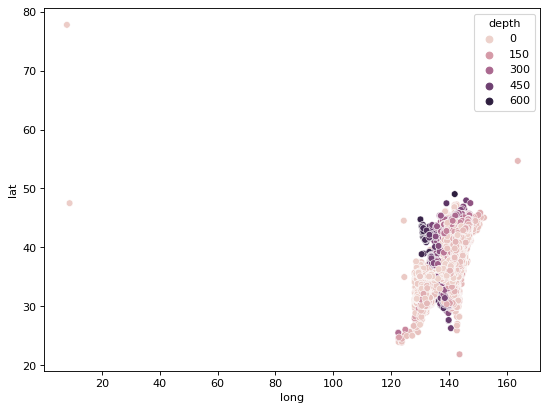

In [4]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

sns.scatterplot(x=data.long, y=data.lat, hue=data.depth)

We notice some outliers and we will get rid of them before further analysis.

In [5]:
df = data.drop(data[(data.long < 100) & (data.lat > 62)].index)

(20.22414, 53.0)

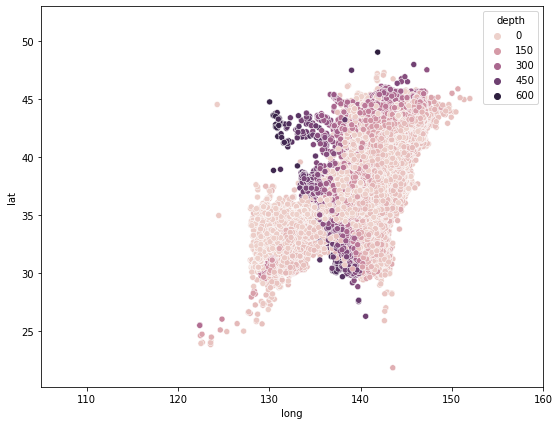

In [6]:
plt.figure(figsize=(9, 7))
sns.scatterplot(x = df.long, y = df.lat, hue = df.depth)
plt.xlim(105, 160)
plt.ylim(top=53)

In [7]:
df.rename({"class": "magnitude"}, axis=1, inplace=True)

(20.22414, 53.0)

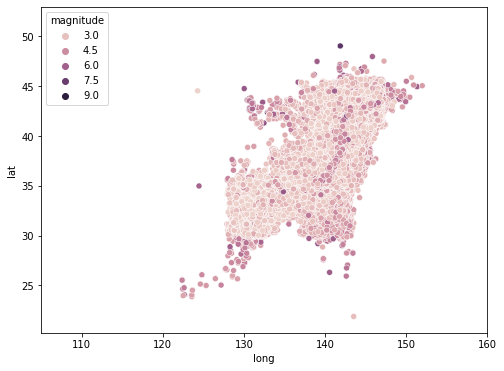

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = df.long, y = df.lat, hue = df.magnitude)
plt.xlim(105, 160)
plt.ylim(top=53)

In [9]:
last_9_eq = df[df.year > 2005]

IndexError: index 9 is out of bounds for axis 0 with size 9

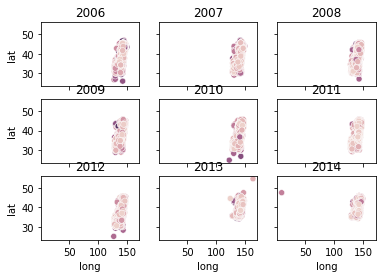

In [10]:
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True)
ax = axs.flatten()
for i, year in enumerate(range(2006, 2016)):
    d_year = last_9_eq[last_9_eq.year == year]
    sns.scatterplot(ax=ax[i], x = d_year.long, y = d_year.lat, hue=d_year.magnitude, legend=False)
    ax[i].set_title(year)

Let's plot earthquake with magnitude > 6

In [11]:
mag_threshold = 6

In [12]:
df_t = df[df.magnitude > mag_threshold]

(25.161455, 53.0)

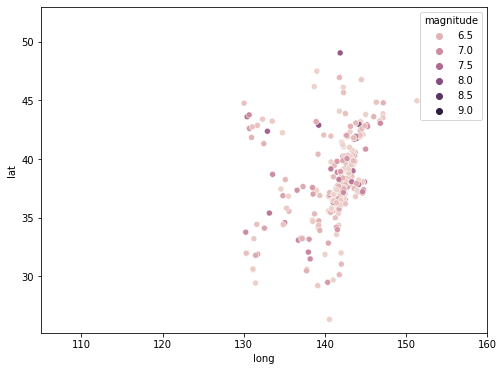

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = df_t.long, y = df_t.lat, hue = df_t.magnitude)
plt.xlim(105, 160)
plt.ylim(top=53)

In [14]:
from mpl_toolkits.basemap import Basemap

[]

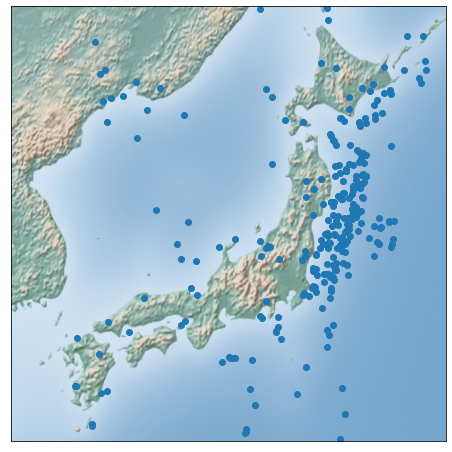

In [28]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None, lat_1=36, lat_2=41, lat_0=38.2, lon_0=137, width=1.8E6, height=1.8E6,)
m.shadedrelief()
xpt, ypt = m(df_t.long, df_t.lat)
m.plot(xpt, ypt, 'o')
plt.plot()